In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.1


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16),
    Softmax()
])
    

In [4]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
softmax (Softmax)            (None, 16)                0         
Total params: 12,560
Trainable params: 12,560
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model

model = Sequential()
model.add(Conv2D(32,(5,5),strides=(1,1),input_shape=(28,28,1),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(5,5),strides=(1,1),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               102500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [7]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               102500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [41]:
# Define the model optimizer, loss function and metrics

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', 'recall', 'precision'])

In [119]:
from pprint import pprint
# Print the resulting model attributes

pprint(model.distribute_strategy)
pprint(model.layers)
pprint(model.metrics_names)
pprint(model.metrics)
pprint(model.optimizer)
pprint(model.loss)
pprint(model.run_eagerly)

['loss', 'accuracy', 'mae', 'recall', 'precision']
False


***
<a id="coding_tutorial_4"></a>
## The fit method

In [138]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [139]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [140]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [141]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [142]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255.0
test_images = test_images/255.0



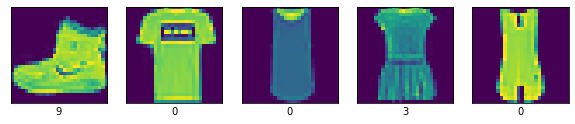

In [143]:
# Display one of the images
import matplotlib.pyplot as plt
%matplotlib inline  

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(train_labels[i])
plt.show()

#### Fit the model

In [144]:
# Fit the model
# train_images = train_images.reshape(train_images.shape + (1,))
# test_images = test_images.reshape(test_images.shape + (1,))

train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]


print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [146]:
import tensorflow.keras.backend as K

def precision(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', 'mae', recall, precision])

history = model.fit(train_images, train_labels, epochs=2, batch_size=32, verbose=1,
                    validation_data=(test_images, test_labels))

Epoch 1/2
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5500 - accuracy: 0.9112 - mae: 4.4200 - recall: 1.0039 - precision: 0.9036 - val_loss: 1.5632 - val_accuracy: 0.8978 - val_mae: 4.4200 - val_recall: 1.0047 - val_precision: 0.9045
Epoch 2/2
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5487 - accuracy: 0.9125 - mae: 4.4200 - recall: 1.0035 - precision: 0.9032 - val_loss: 1.5668 - val_accuracy: 0.8942 - val_mae: 4.4200 - val_recall: 1.0054 - val_precision: 0.9051


#### Plot training history

In [110]:
# Load the history into a pandas Dataframe
# Make a plot for the loss
from pprint import pprint
import pandas as pd 
# Load the history into a pandas Dataframe
df_history = pd.DataFrame(history.history)

print(history)
print(history.history.keys())
pprint(history.history)


df_history

dict_keys(['loss', 'accuracy', 'mae', 'recall', 'precision', 'val_loss', 'val_accuracy', 'val_mae', 'val_recall', 'val_precision'])
{'accuracy': [0.9121666550636292,
              0.9147999882698059,
              0.913516640663147,
              0.9133833050727844,
              0.9100833535194397],
 'loss': [1.5485789775848389,
          1.5460926294326782,
          1.5473157167434692,
          1.547709345817566,
          1.5506495237350464],
 'mae': [4.420015811920166,
         4.420008182525635,
         4.420012474060059,
         4.420013427734375,
         4.420012474060059],
 'precision': [0.9065666794776917,
               0.9057666659355164,
               0.905584454536438,
               0.9053666591644287,
               0.9057773947715759],
 'recall': [1.0071892738342285,
            1.006324291229248,
            1.0062211751937866,
            1.0058882236480713,
            1.0063331127166748],
 'val_accuracy': [0.8888000249862671,
                  0.88150000572204

,loss,accuracy,mae,recall,precision,val_loss,val_accuracy,val_mae,val_recall,val_precision
0,1.548579,0.912167,4.420016,1.007189,0.906567,1.572124,0.8888,4.419997,1.006728,0.906150
1,1.546093,0.914800,4.420008,1.006324,0.905767,1.579225,0.8815,4.419997,1.007784,0.907149
2,1.547316,0.913517,4.420012,1.006221,0.905584,1.565459,0.8952,4.419997,1.007161,0.906649
3,1.547709,0.913383,4.420013,1.005888,0.905367,1.574944,0.8860,4.419997,1.008503,0.907847
4,1.550650,0.910083,4.420012,1.006333,0.905777,1.568185,0.8928,4.419997,1.006670,0.906150


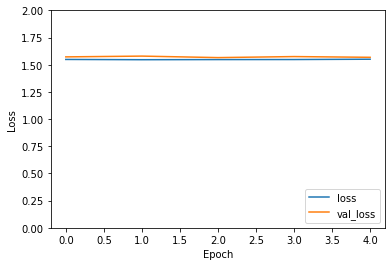

In [111]:
# Make a plot for the loss

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.show()

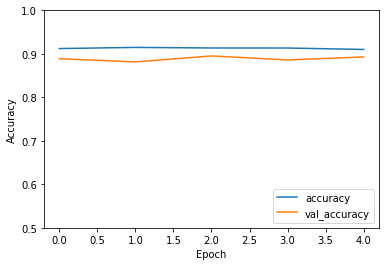

In [112]:
# Make a plot for the accuracy

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

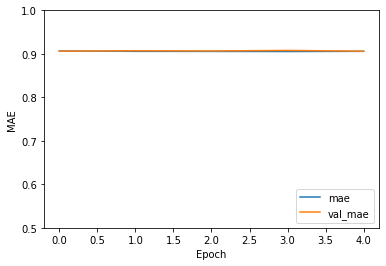

In [113]:
# Make a plot for the additional metric

plt.plot(history.history['precision'], label='mae')
plt.plot(history.history['val_precision'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [114]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [118]:
# Evaluate the model

train_loss, train_acc, train_mae, train_recall, train_precision = model.evaluate(train_images,  train_labels, verbose=2)
test_loss, test_acc, test_mae, train_recall, train_precision = model.evaluate(test_images,  test_labels, verbose=2)
print('Train Accuracy: {:0.1f}%, Test Accuracy: {:0.1f}%'.format(100 * train_acc, 100*test_acc)) 
print('Train Loss: {:0.4f}, Test Loss: {:0.4f}'.format(train_loss, test_loss)) 
print('Train MAE: {:0.4f}, Test MAE: {:0.4f}'.format(train_mae, test_mae)) 

1875/1875 - 5s - loss: 1.5467 - accuracy: 0.9143 - mae: 4.4200 - recall: 1.0078 - precision: 0.9072
313/313 - 1s - loss: 1.5682 - accuracy: 0.8928 - mae: 4.4200 - recall: 1.0067 - precision: 0.9062
Train Accuracy: 91.4%, Test Accuracy: 89.3%
Train Loss: 1.5467, Test Loss: 1.5682
Train MAE: 4.4200, Test MAE: 4.4200


#### Make predictions from the model

(1, 28, 28, 1)
(28, 28, 1)


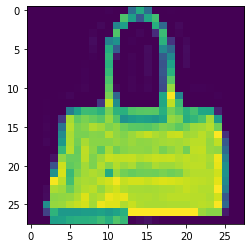

Label: Bag


In [120]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
print(np.array([test_images[random_inx]]).shape)

test_image = test_images[random_inx]
print(test_image.shape)
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [132]:
# Get the model predictions

predictions = model.predict(np.array([test_images[random_inx]]))
print(predictions.shape)
predictions = np.argmax(predictions, -1)
predict_labels = [labels[prediction] for prediction in predictions] 
print(predict_labels)

(1, 10)
['Bag']
